In [3]:
import os
import pandas as pd

In [4]:
os.chdir('C:\\Users\\Suraj\\Desktop\\IIIT\\NLG\\Project\\CPSFiles')
files_list = os.listdir('C:\\Users\\Suraj\\Desktop\\IIIT\\NLG\\Project\\CPSFiles')

In [5]:
for f in files_list:
    xaxis_label = f.split('-')[2].split('_')[1] + '-' + f.split('-')[1].split('_')[1]
    print(xaxis_label)
    print(f)

none-0.1
cps-threshold_0.1-masktype_none-testsrc_generation_em.txt
pad-0.1
cps-threshold_0.1-masktype_pad-testsrc_generation_em.txt
none-0.3
cps-threshold_0.3-masktype_none-testsrc_generation_em.txt
pad-0.3
cps-threshold_0.3-masktype_pad-testsrc_generation_em.txt
pad-0.3
cps-threshold_0.3-masktype_pad-testsrc_testtgt.txt
pad-0.5
cps-threshold_0.5-masktype_pad-testsrc_generation_em.txt


In [6]:
plot_data = {}
for f in files_list:
    xaxis_label = f.split('-')[2].split('_')[1] + '-' + f.split('-')[1].split('_')[1]
    file_i = open(f,'r',encoding="utf8")
    data = file_i.read()
    data_dict = eval(str(data))
    #print(xaxis_label,':',data_dict['scores'])
    plot_data[xaxis_label] = data_dict['scores']

<AxesSubplot:title={'center':'Distribution of CPS Score by Experiment'}>

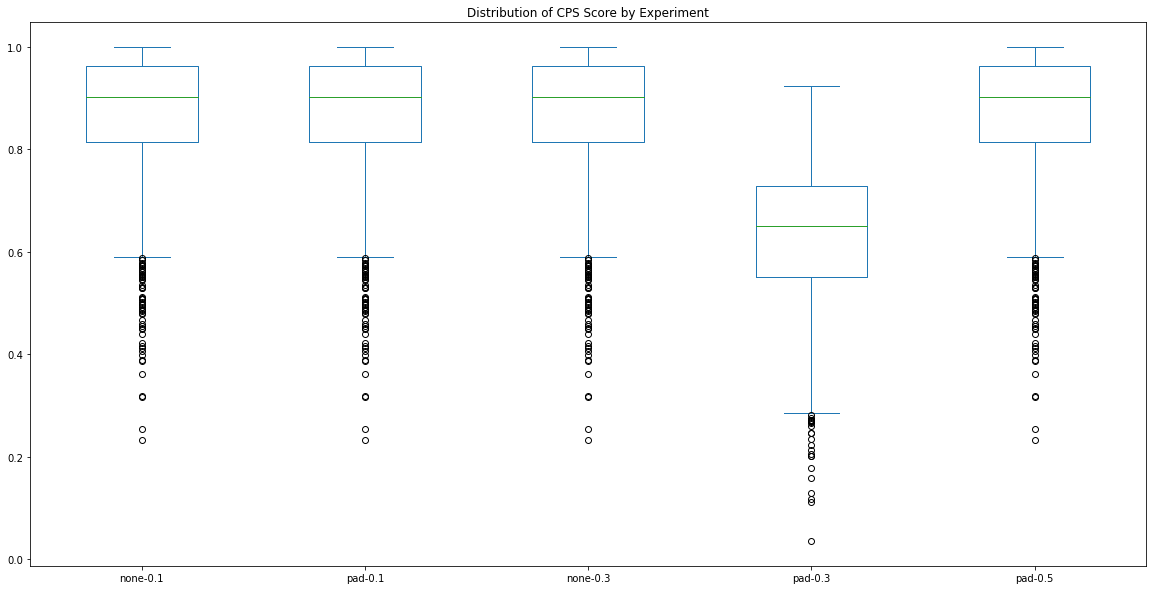

In [7]:
pd.DataFrame.from_dict(plot_data).plot.box(
        title="Distribution of CPS Score by Experiment", figsize=(20, 10)
    )

In [8]:
plot_data2 = pd.DataFrame()

for f in files_list:
    file_i = open(f,'r',encoding="utf8")
    data = file_i.read()
    data_dict = eval(str(data))
    data_desc = pd.DataFrame(data_dict['scores']).describe().T
    print(data_desc)
    data_desc['mask_type'] = f.split('-')[2].split('_')[1]
    data_desc['threshold'] = f.split('-')[1].split('_')[1]
    data_desc_i = data_desc[["mask_type", "threshold","mean", "50%"]]
    #print(data_desc_i)
    plot_data2 = plot_data2.append(data_desc_i, ignore_index = True)

    count      mean       std      min       25%       50%       75%  max
0  1416.0  0.870047  0.124019  0.23169  0.813565  0.902551  0.963489  1.0
    count      mean       std      min       25%       50%       75%  max
0  1416.0  0.870047  0.124019  0.23169  0.813565  0.902551  0.963489  1.0
    count      mean       std      min       25%       50%       75%  max
0  1416.0  0.870047  0.124019  0.23169  0.813565  0.902551  0.963489  1.0
    count      mean       std      min       25%       50%       75%  max
0  1416.0  0.870047  0.124019  0.23169  0.813565  0.902551  0.963489  1.0
    count      mean       std       min       25%       50%       75%  \
0  1416.0  0.631554  0.137035  0.035034  0.550053  0.650069  0.728369   

        max  
0  0.923254  
    count      mean       std      min       25%       50%       75%  max
0  1416.0  0.870047  0.124019  0.23169  0.813565  0.902551  0.963489  1.0


In [115]:
plot_data2

,mask_type,threshold,mean,50%
0,none,0.1,0.911511,0.949077
1,pad,0.1,0.858182,0.895749
2,remove,0.1,0.911511,0.949077
3,none,0.3,0.911511,0.949077
4,pad,0.3,0.911511,0.949077
5,remove,0.3,0.911511,0.949077


In [29]:
def inspect_style_mask_results(result_df, nrows=10):
    """
    Given a CPS Evaluation result_df, print out original and masked
    versions of text for both source and target.
    """

    for i, row in result_df[:nrows].iterrows():
        print()
        print("CPS_SCORE:", row["scores"])
        print(
            "SOURCE_TEXT:",
            f"\n\t {row['masked_input_text']}",
        )
        print(
            "TARGET_TEXT:",
            f"\n\t {row['masked_output_text']}",
        )
        print("-------------------------------------------------")

In [33]:
f = "cps-threshold_0.3-masktype_pad-testsrc_generation_em.txt"
file_i = open(f,'r',encoding="utf8")
data = file_i.read()
data_dict = eval(str(data))
df = pd.DataFrame.from_dict(data_dict)
df

,scores,masked_input_text,masked_output_text
0,0.982947,is any [PAD] really a freak.,is any [PAD] really a freak?
1,0.954678,"aspen colorado has he best music festivals, yo...",aspen colorado has one of the best music festi...
2,1.000000,[PAD] can get almost anything on ebay!,[PAD] can get almost anything on ebay!
3,0.787280,everybody [PAD] dying to get in,everyone is [PAD] to get in.
4,0.939833,not idiots like 50 cent and his whole gay unit...,not idiots like 50 cent and his entire gay uni...
...,...,...,...
1411,0.317632,i lubb it. [PAD] [ 8 ] ill keep u my dirrty li...,i love it. i will keep you my little girl [PAD]
1412,0.949687,i guess it is the blond from [PAD] idol,i guess it is the blond from american idol [PAD]
1413,0.915923,( no offance ) [PAD] you can answer that then ...,"if you can answer that, then it is the same fo..."
1414,0.975332,"the song was called epic, i [PAD]t remember th...",the song was called epic. i cannot remember th...


In [34]:
import pandas as pd
inspect_style_mask_results(df.sort_values(by="scores", ascending=False), nrows=5)



CPS_SCORE: 1.000000238418579
SOURCE_TEXT: 
	 so the blonde went home, got on her hands and knees and started blowing on the tail pipe [PAD]
TARGET_TEXT: 
	 so the blonde went home, got on her hands and knees and started blowing on the tail pipe [PAD]
-------------------------------------------------

CPS_SCORE: 1.000000238418579
SOURCE_TEXT: 
	 do we really want them to get [PAD]?
TARGET_TEXT: 
	 do we really want them to get [PAD]?
-------------------------------------------------

CPS_SCORE: 1.0000001192092896
SOURCE_TEXT: 
	 i was once told that i looked like timothy hutton, but i was young then [PAD]
TARGET_TEXT: 
	 i was once told that i looked like timothy hutton, but i was young then [PAD]
-------------------------------------------------

CPS_SCORE: 1.0000001192092896
SOURCE_TEXT: 
	 what kind of [PAD] do you do?
TARGET_TEXT: 
	 what kind of [PAD] do you do?
-------------------------------------------------

CPS_SCORE: 1.0000001192092896
SOURCE_TEXT: 
	 i am not [PAD] liking b

In [35]:
import pandas as pd
inspect_style_mask_results(df.sort_values(by="scores", ascending=True), nrows=5)



CPS_SCORE: 0.2316901981830597
SOURCE_TEXT: 
	 i ask to peoples who gave answer for this question where is your jocks????!!! [PAD]
TARGET_TEXT: 
	 i ask people who gave the [PAD] for this question.
-------------------------------------------------

CPS_SCORE: 0.2537332773208618
SOURCE_TEXT: 
	 i found it and still do irresistible [PAD]!
TARGET_TEXT: 
	 i [PAD] it and still do.
-------------------------------------------------

CPS_SCORE: 0.3173408508300781
SOURCE_TEXT: 
	 hell to the no [PAD]. they are one of the best bands out there.
TARGET_TEXT: 
	 yes, they are one of the best beds out there [PAD]
-------------------------------------------------

CPS_SCORE: 0.31763163208961487
SOURCE_TEXT: 
	 i lubb it. [PAD] [ 8 ] ill keep u my dirrty little secret.. hha... shhh..... lmao
TARGET_TEXT: 
	 i love it. i will keep you my little girl [PAD]
-------------------------------------------------

CPS_SCORE: 0.36134201288223267
SOURCE_TEXT: 
	 stop being posers and get a [PAD]
TARGET_TEXT: 
	 